# SURVIVAL ANALYSIS ON THE TITANIC


## 1.Research Question

To predict who would have survived the wreckage of the titanic (using the KNN algorithm)

## 2.Reading the datasets

In [1]:
#importing the necessary libaries to be used in this notebook
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [2]:
#loading and reading the datasets
titanic = pd.read_csv('titanic.csv',delimiter=",",quotechar='"')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#Checking on information about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Checking the size of the dataset
titanic.shape

(891, 12)

In [ ]:
#Checking the data types of all the columns
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# from the name column we can get the titles
import re

def get_title(name):
  search_title = re.search('([A-Za-z]+)\.', name)
  if search_title:
    return search_title.group(1)
  return ""

for dataset in titanic:
    titanic['Title'] = titanic['Name'].apply(get_title)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [10]:
# checking for unique values
for column in titanic:
  print(column)
  print(titanic[column].unique())
  print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [9]:
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
print(titanic['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Major' 'Lady' 'Sir' 'Col'
 'Capt' 'Countess' 'Jonkheer']


In [11]:
# Checking whether each column has an appropriate datatype
#
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## 3.Data Description

In [ ]:
#Checking all the column names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

From here we shall describe what each column means


1. PassengerId = unique key/identifier of each passenger on that particular titanic trip
2. Survived = Did the passenger survive or not
3. Pclass = The class the passenger paid for
4. Name = Name of passenger
5. Sex =  Gender of passenger
6. Age = Age of passenger
7. SibSp =  whether one came with a sibling or spouse 
8. Parch =  type of parch
9. Ticket = Ticket number of the trip
10. Fare = Amount of money paid for the trip
11. Cabin = Section of ship one was staying in
12. Embarked = The port one departed from 




## 4.Data Cleaning

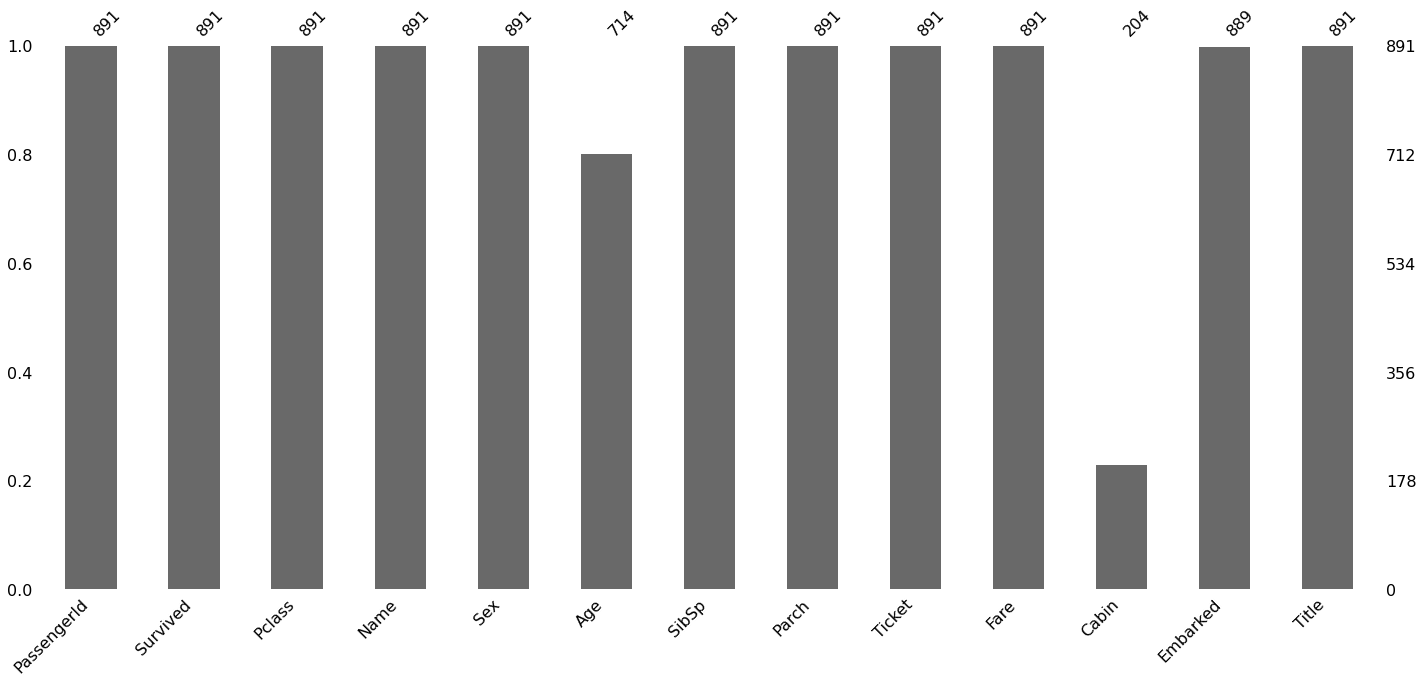

In [12]:
#Missing Data Analysis
#In order to visualize missing value, package missingno is used. 
#First bar plot is used to get the missing value. The column which will have missing value, show small length of bar.
msno.bar(titanic)
plt.show()

from here we can see that the age and cabin data have missing values

In [13]:
#Now we examine the exact amount of missing values in the dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

1. PassengerId      0
2. Survived         0
3. Pclass           0
4. Name             0
5. Sex              0
6. Age            177
7. SibSp            0
8. Parch            0
9. Ticket           0
10. Fare             0
11. Cabin          687
12. Embarked         2
13. dtype: int64

From here we see that embarked too has missing values

if we try to remove all the null values from the age column it will make the dataset quite small so we will fill it up with the average values and the cabin which has more than half null values than placed values it is safe to say its best to drop it


In [14]:
# Fill in missing in age with the mean value of age
titanic["Age"].fillna(titanic["Age"].mean(), inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr


In [15]:
#Dropping the column Cabin
titanic.drop('Cabin', axis=1, inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


In [16]:
# Removing the null values in the embarked column
titanic.dropna(subset=['Embarked'], how='all', inplace=True)


In [17]:
#confirming 
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [18]:
# drop columns which are not necessary for analysis
#
titanic = titanic.drop(['Name', 'PassengerId', 'SibSp', 'Parch'], axis=1)

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# encoding columns: Sex, Tickets, Embarked 
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic['Ticket'] = label_encoder.fit_transform(titanic['Ticket'])
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])
titanic['Title'] = label_encoder.fit_transform(titanic['Title'])

# Previewing the data
titanic.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title
0,0,3,1,22.0,522,7.2500,2,10
1,1,1,0,38.0,595,71.2833,0,11
2,1,3,0,26.0,668,7.9250,2,9
3,1,1,0,35.0,48,53.1000,2,11
4,0,3,1,35.0,471,8.0500,2,10


## 5.Exploratory Data Analysis

### a).Univariate Analysis

In [19]:
# summary statistics
titanic.describe()

,Survived,Pclass,Age,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,32.096681
std,0.486260,0.834700,12.968366,49.697504
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,22.000000,7.895800
50%,0.000000,3.000000,29.699118,14.454200
75%,1.000000,3.000000,35.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [ ]:
#kurtosis
titanic.kurt()

PassengerId    -1.197156
Survived       -1.769179
Pclass         -1.269437
Age             0.979007
SibSp          17.838972
Parch           9.750592
Fare           33.508477
dtype: float64

In [20]:
#skewness
titanic.skew()

Survived    0.484568
Pclass     -0.636998
Age         0.431720
Fare        4.801440
dtype: float64

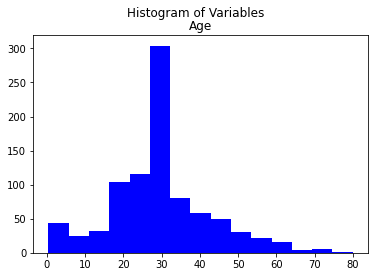

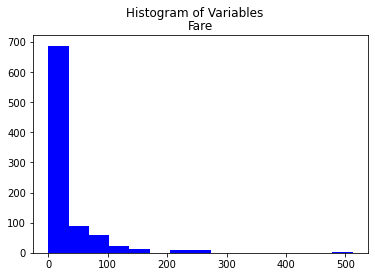

In [21]:
Num_vars = ['Age','Fare']
for col in Num_vars:
  plt.hist(titanic[col],bins=15,color="blue")
  plt.suptitle("Histogram of Variables")
  plt.title(col)
  plt.show()

Imported AutoViz_Class version: 0.0.71. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'
Shape of your Data Set: (891, 12)
Classifying variables in data set...
    12 Predictors classified...
        This does not include the Target column(s)
    4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Time to run AutoViz (in seconds) = 1.810


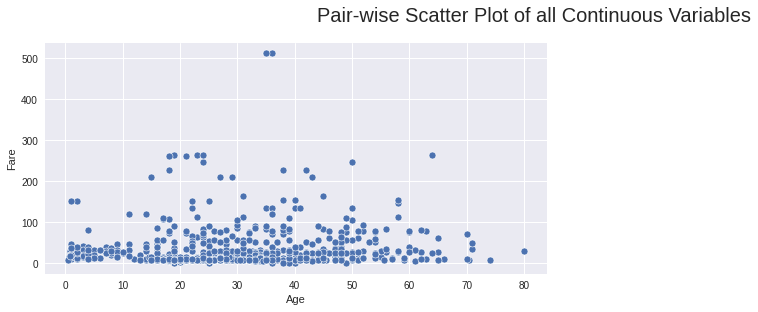

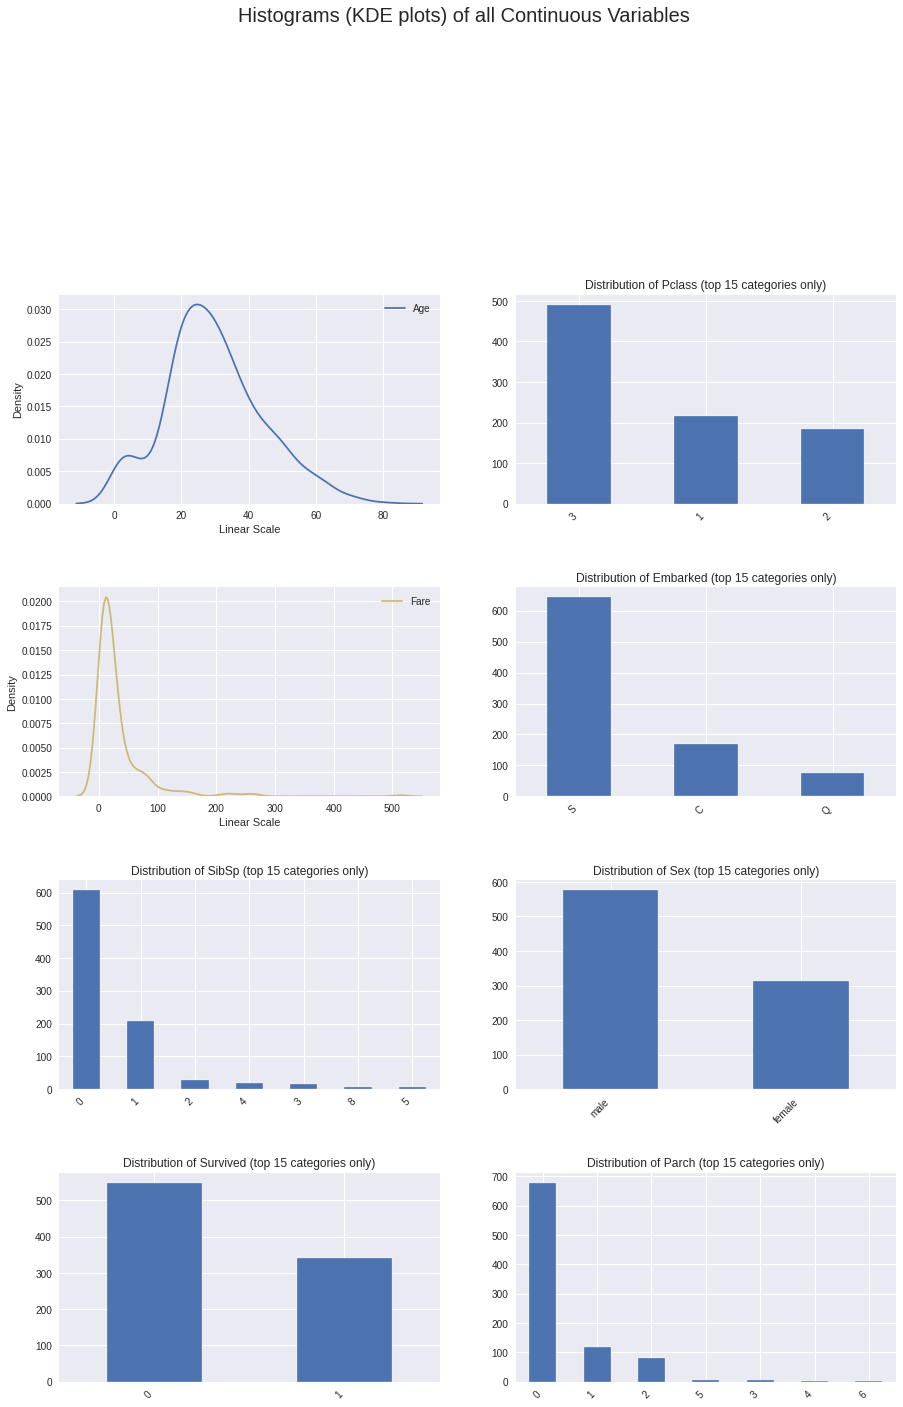

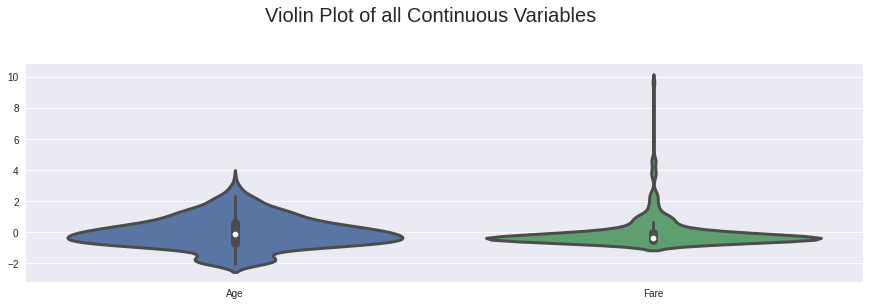

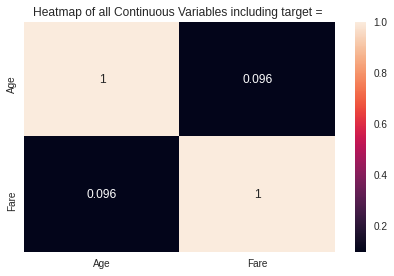

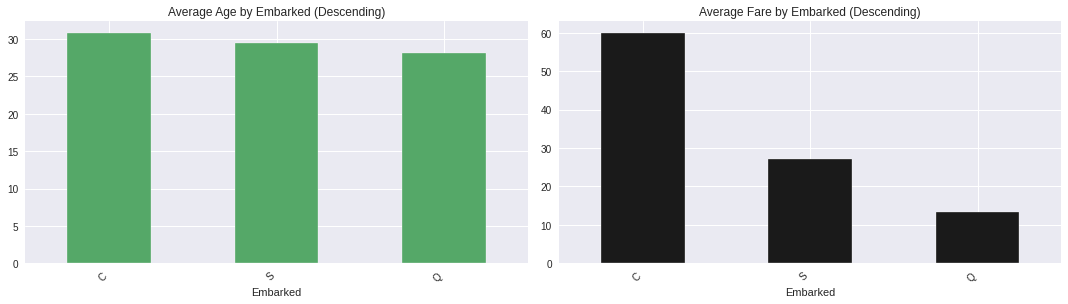

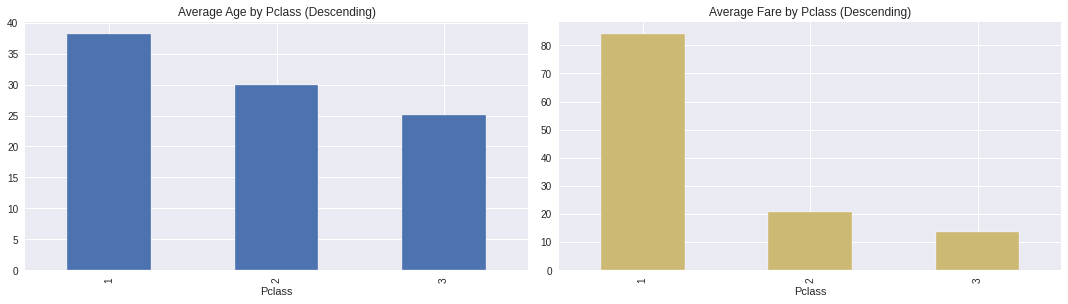

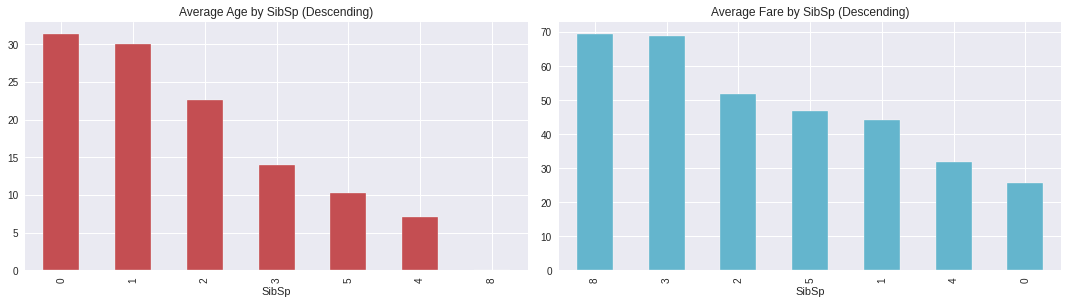

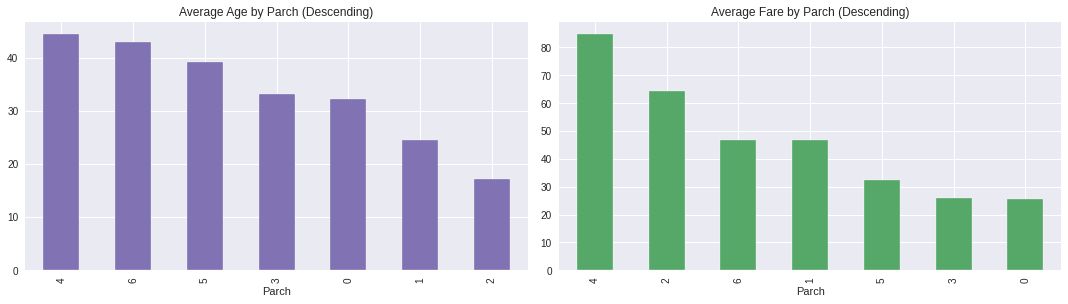

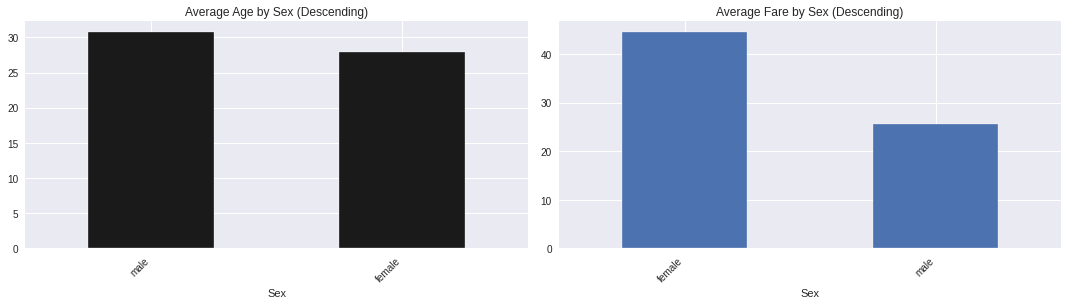

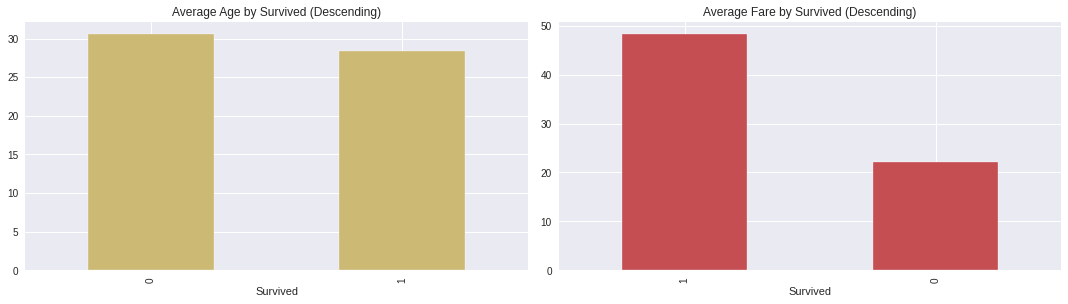

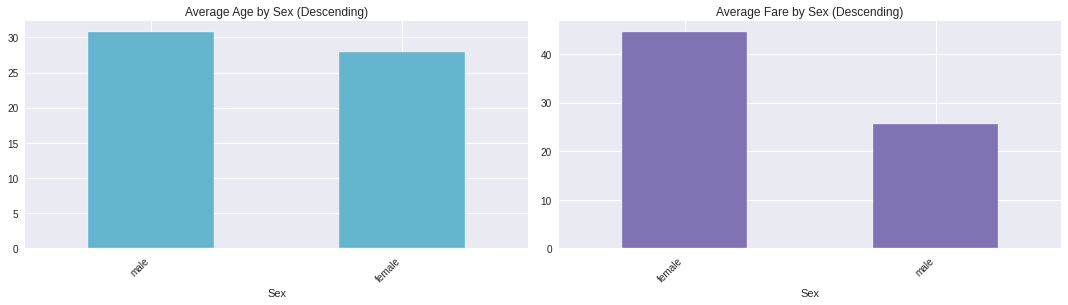

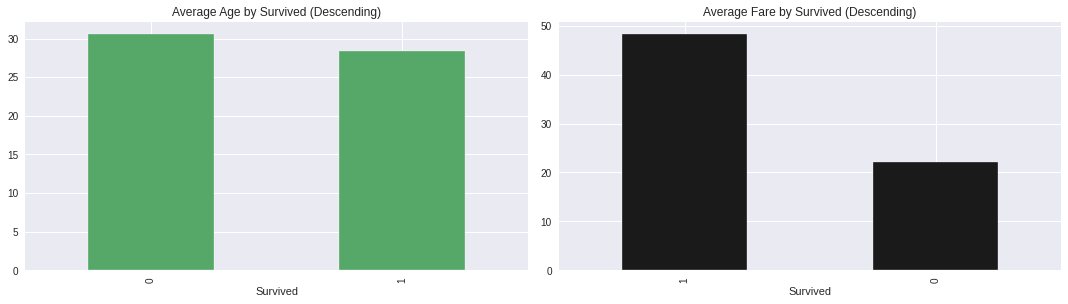

In [22]:
%pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
titanic_visuals = AV.AutoViz("titanic.csv")

### b).Bivariate Analysis

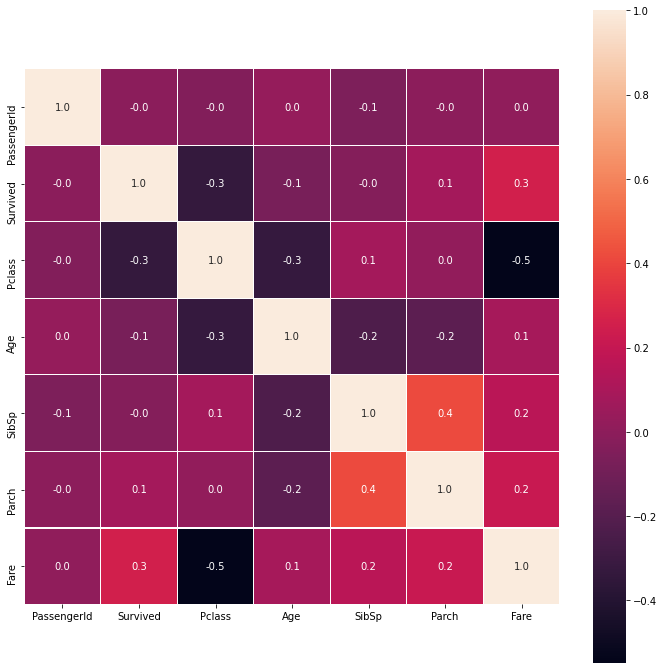

In [ ]:
#FIRST OF WE START BY FINDING THE CORELATION BETWEEN ALL THE VARIABLES

f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(titanic.corr(),annot=True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)
plt.show()

Text(0.5, 1.0, 'Relationship between Survived and Fare')

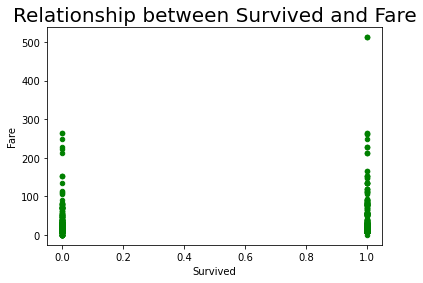

In [ ]:
# FROM THE HEATMAP SURVIVED AND FARE VERY CLOSELY RELATED WITH A VALUE OF 0.3 
titanic.plot.scatter(x = 'Survived' , y = 'Fare' ,color='Green')
plt.title('Relationship between Survived and Fare', fontsize = 20)

Text(0.5, 1.0, 'Relationship between SibSp and Parch')

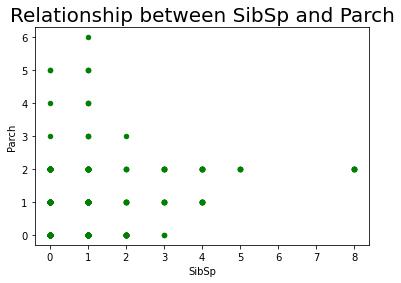

In [ ]:
# FROM THE HEATMAP SibSp AND PARCH VERY CLOSELY RELATED WITH A VALUE OF 0.4 
titanic.plot.scatter(x = 'SibSp' , y = 'Parch' ,color='Green')
plt.title('Relationship between SibSp and Parch', fontsize = 20)

## 6.Analysis via  KNN

In [25]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked',
       'Title'],
      dtype='object')

In [28]:
# Splitting our data
# ---
# 
# Dividing dataset into features and labels
X = titanic.drop(columns = ['Survived'])
X
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [29]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#Performing LDA to optimize the data
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [31]:
#To find the optimal value of K ('n_neighbours) to use in the next code
import math
math.sqrt(len(y_test))

13.341664064126334

so our optimal k for this dataset is 13..and we will stick to 13 also because its an odd number

In [32]:
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [33]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [34]:
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[84 21]
 [32 41]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       105
           1       0.66      0.56      0.61        73

    accuracy                           0.70       178
   macro avg       0.69      0.68      0.68       178
weighted avg       0.70      0.70      0.70       178



In [35]:
# Finding Accuracy
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

KNN model accuracy(in %): 70.2247191011236


In [ ]:
####
#splitting the data into 70-30 sets


In [36]:
# Splitting our data
# ---
# 
# Dividing dataset into features and labels
X = titanic.drop(columns = ['Survived'])
X
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
#
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#
#Performing LDA to optimize the data
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
#
#To find the optimal value of K ('n_neighbours) to use in the next code
import math
math.sqrt(len(y_test))
#
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)
#
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
#
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#
# Finding Accuracy
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

[[139  18]
 [ 45  65]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       157
           1       0.78      0.59      0.67       110

    accuracy                           0.76       267
   macro avg       0.77      0.74      0.74       267
weighted avg       0.77      0.76      0.76       267

KNN model accuracy(in %): 76.40449438202246


In [ ]:
###
# splitting the datasets 60-40 sets


In [37]:
# Splitting our data
# ---
# 
# Dividing dataset into features and labels
X = titanic.drop(columns = ['Survived'])
X
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)
#
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#
#Performing LDA to optimize the data
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
#
#To find the optimal value of K ('n_neighbours) to use in the next code
import math
math.sqrt(len(y_test))
#
# Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)
#
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)
#
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#
# Finding Accuracy
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

[[180  36]
 [ 49  91]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       216
           1       0.72      0.65      0.68       140

    accuracy                           0.76       356
   macro avg       0.75      0.74      0.75       356
weighted avg       0.76      0.76      0.76       356

KNN model accuracy(in %): 76.12359550561798


We can see that if we split the data into 70-30 sets we get the highest accuracy of our model


The models have performed quite well with accuracy about 76.4% 

 Recommendations : This kind of non parametric algorithm majorly to function well one needs to find the optimal value of k thus if one cant find it will opt to the common one of 5 which may not be accurate, one may also normalize or standardize  the data and use other optimization techniques available to see whether they will be improvements to the model